In [1]:
# star formation histories

In [1]:
import csv
import h5py
import requests
import numpy as np
import scipy.integrate
import illustris_python as il
import matplotlib.pyplot as plt
from itertools import zip_longest
from scipy.optimize import fminbound
from hoki.csp.eventrate import CSPEventRate
from hoki.constants import BPASS_EVENT_TYPES, BPASS_METALLICITIES
import matplotlib as mpl

In [2]:
data = h5py.File(f"./data.h5", "r")
redshifts = data['SFH']['TNG'].attrs['redshift']

In [3]:
@np.vectorize
def calc_LB(z, omega0, omega1, hubble):
    '''
    Calculates the lookback time according to Hobbs.

    Parameters:
    z : float
        The redshift at which you want to calculate the lookback
    omega0 : float
        The Matter density parameter (0.3111 Planck 2018)
    omega1 : float
        The dark energy density parameter (0.6889 Planck 2018)
    hubble : float
        The hubble parameters (0.6766 Planck 2018)
    '''
    def func(x):
        E = np.sqrt(omega0*(1+x)**3 + omega1)
        return 1/((1+x)*E)
    # can be simplified by already doing the extra coefficient calculations
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *scipy.integrate.quad(func, 0, z)[0]/(60*60*24*365.2388526)

In [4]:
h = 0.6774
omega_M = 0.3089
omega_L = 0.6911

lb_time99_old = calc_LB(redshifts, omega_M, omega_L, h)
lb_time91_old = calc_LB(redshifts[8:], omega_M, omega_L, h)
lb_time84 = calc_LB(redshifts[15:], omega_M, omega_L, h)
lb_time78 = calc_LB(redshifts[21:], omega_M, omega_L, h)
lb_time72 = calc_LB(redshifts[27:], omega_M, omega_L, h)
lb_time67_old = calc_LB(redshifts[32:], omega_M, omega_L, h)
lb_time50_old = calc_LB(redshifts[49:], omega_M, omega_L, h)
lb_time33 = calc_LB(redshifts[66:], omega_M, omega_L, h)
lb_time25 = calc_LB(redshifts[74:], omega_M, omega_L, h)
lb_time21 = calc_LB(redshifts[78:], omega_M, omega_L, h)
lb_time17 = calc_LB(redshifts[82:], omega_M, omega_L, h)
lb_time04 = calc_LB(redshifts[95:], omega_M, omega_L, h)

lb_time99 = [num/1e9 for num in lb_time99_old]
lb_time91 = [num/1e9 for num in lb_time91_old]
lb_time50 = [num/1e9 for num in lb_time50_old]
lb_time67 = [num/1e9 for num in lb_time67_old]

In [ ]:
lb_time99, redshifts

In [6]:
allSFR2 = []
with open('./Subhalo Data/mass2_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_99 = [num*(139/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_91 = [num*(128/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_84 = [num*(127/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_78 = [num*(123/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_72 = [num*(111/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_67 = [num*(98/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_50 = [num*(55/10)/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass2_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9])]
SFH2_33 = [num*(12/10)/(106.5**3) for num in SFR2]  # normalisation

In [7]:
allSFR3 = []
with open('./Subhalo Data/mass3_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_99 = [num*(1371/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_91 = [num*(1356/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_84 = [num*(1339/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_78 = [num*(1341/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_72 = [num*(1323/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_67 = [num*(1316/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_50 = [num*(1171/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_33 = [num*(624/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_25 = [num*(233/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_21 = [num*(56/10)/(106.5**3) for num in SFR3]  # normalisation

allSFR3 = []
with open('./Subhalo Data/mass3_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR3.append(row)
for index, sfr_list in enumerate(allSFR3):
    allSFR3[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR3 = [sum(x) for x in zip(allSFR3[0], allSFR3[1], allSFR3[2], allSFR3[3], allSFR3[4], allSFR3[5], allSFR3[6], allSFR3[7], allSFR3[8], allSFR3[9])]
SFH3_17 = [num*(10/10)/(106.5**3) for num in SFR3]  # normalisation

In [8]:
allSFR4 = []
with open('./Subhalo Data/mass4_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_99 = [num*(12271/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_91 = [num*(12305/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_84 = [num*(12308/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_78 = [num*(12279/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_72 = [num*(12208/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_67 = [num*(12112/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_50 = [num*(11594/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_33 = [num*(9308/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_25 = [num*(5911/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_21 = [num*(3175/10)/(106.5**3) for num in SFR4]  # normalisation

allSFR4 = []
with open('./Subhalo Data/mass4_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR4.append(row)
for index, sfr_list in enumerate(allSFR4):
    allSFR4[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR4 = [sum(x) for x in zip(allSFR4[0], allSFR4[1], allSFR4[2], allSFR4[3], allSFR4[4], allSFR4[5], allSFR4[6], allSFR4[7], allSFR4[8], allSFR4[9])]
SFH4_17 = [num*(1387/10)/(106.5**3) for num in SFR4]  # normalisation

In [9]:
allSFR5 = []
with open('./Subhalo Data/mass5_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_99 = [num*(85812/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_91 = [num*(86196/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_84 = [num*(86612/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_78 = [num*(87180/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_72 = [num*(87577/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_67 = [num*(88132/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_50 = [num*(89484/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_33 = [num*(85889/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_25 = [num*(73873/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_21 = [num*(54789/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_17 = [num*(35229/10)/(106.5**3) for num in SFR5]  # normalisation

allSFR5 = []
with open('./Subhalo Data/mass5_04', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR5.append(row)
for index, sfr_list in enumerate(allSFR5):
    allSFR5[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR5 = [sum(x) for x in zip(allSFR5[0], allSFR5[1], allSFR5[2], allSFR5[3], allSFR5[4], allSFR5[5], allSFR5[6], allSFR5[7], allSFR5[8], allSFR5[9])]
SFH5_04 = [num*(567/10)/(106.5**3) for num in SFR5]  # normalisation

In [10]:
allSFR6 = []
with open('./Subhalo Data/mass6_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_99 = [num*(650475/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_91', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_91 = [num*(659191/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_84', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_84 = [num*(668194/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_78', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_78 = [num*(676557/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_72', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_72 = [num*(685313/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_67 = [num*(693957/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_50 = [num*(729551/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_33', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_33 = [num*(765466/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_25', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_25 = [num*(759504/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_21', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_21 = [num*(678113/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_17', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_17 = [num*(551387/10)/(106.5**3) for num in SFR6]  # normalisation

allSFR6 = []
with open('./Subhalo Data/mass6_04', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR6.append(row)
for index, sfr_list in enumerate(allSFR6):
    allSFR6[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR6 = [sum(x) for x in zip(allSFR6[0], allSFR6[1], allSFR6[2], allSFR6[3], allSFR6[4], allSFR6[5], allSFR6[6], allSFR6[7], allSFR6[8], allSFR6[9])]
SFH6_04 = [num*(50956/10)/(106.5**3) for num in SFR6]  # normalisation

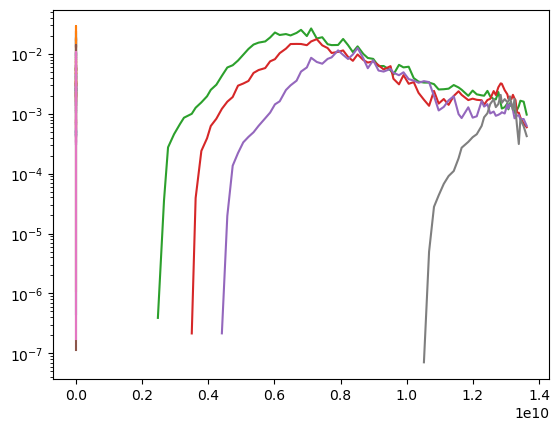

In [11]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33], 
                        [SFH2_99, SFH2_91, SFH2_84, SFH2_78, SFH2_72, SFH2_67, SFH2_50, SFH2_33]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

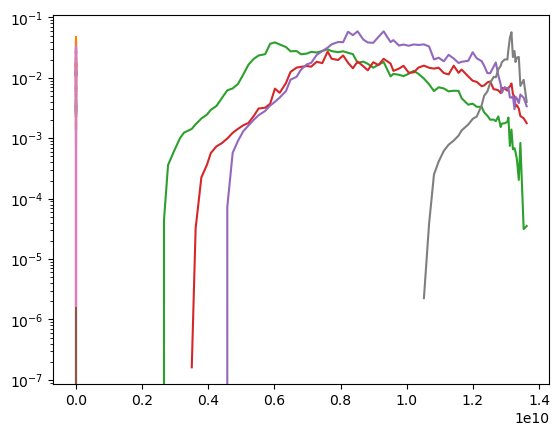

In [12]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33], 
                        [SFH3_99, SFH3_91, SFH3_84, SFH3_78, SFH3_72, SFH3_67, SFH3_50, SFH3_33, SFH3_25, SFH3_21, SFH3_17]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

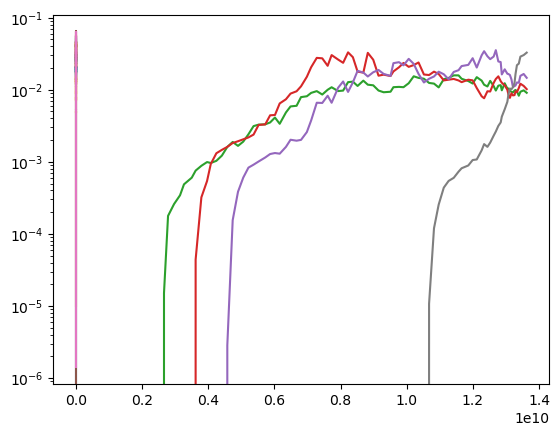

In [13]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33], 
                        [SFH4_99, SFH4_91, SFH4_84, SFH4_78, SFH4_72, SFH4_67, SFH4_50, SFH4_33, SFH4_25, SFH4_21, SFH4_17]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

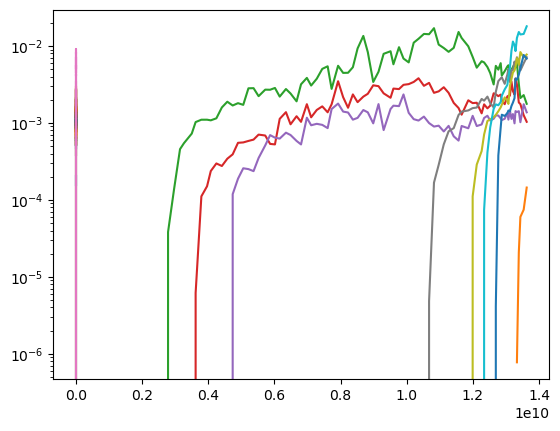

In [14]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33, lb_time25, lb_time21, 
                         lb_time17, lb_time04], [SFH5_99, SFH5_91, SFH5_84, SFH5_78, SFH5_72, SFH5_67, SFH5_50, SFH5_33, SFH5_25, SFH5_21,
                         SFH5_17, SFH5_04]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

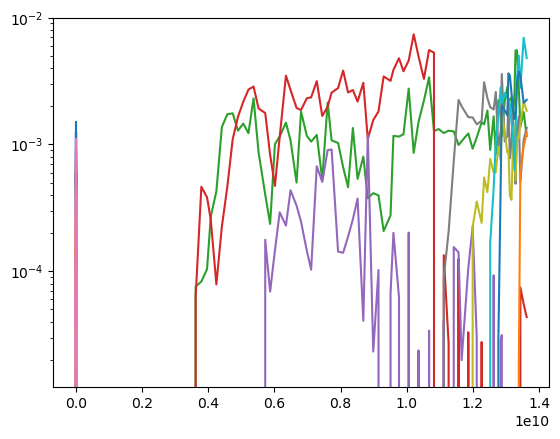

In [15]:
for lb_time, SFH in zip([lb_time99, lb_time91, lb_time84, lb_time78, lb_time72, lb_time67, lb_time50, lb_time33, lb_time25, lb_time21, 
                         lb_time17, lb_time04], [SFH6_99, SFH6_91, SFH6_84, SFH6_78, SFH6_72, SFH6_67, SFH6_50, SFH6_33, SFH6_25, SFH6_21,
                         SFH6_17, SFH6_04]):
    plt.plot(lb_time, SFH)
    plt.yscale('log')

In [16]:
# PLOTS FOR PRESENTATION

(0.0, 14.0)

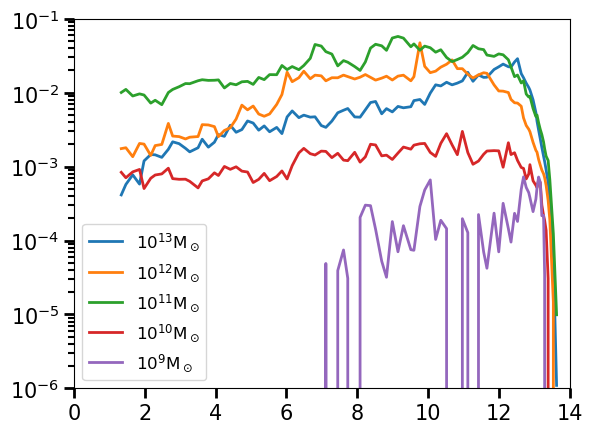

In [17]:
plt.rcParams.update({'font.size': 15})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5

plt.plot(lb_time91, SFH2_91[::-1], label='$10^{13}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH3_91[::-1], label='$10^{12}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH4_91[::-1], label='$10^{11}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH5_91[::-1], label='$10^{10}$M$_\odot$', linewidth=2)
plt.plot(lb_time91, SFH6_91[::-1], label='$10^{9}$M$_\odot$', linewidth=2)
plt.yscale('log')
plt.legend(fontsize=12)
plt.ylim(1e-6, 1e-1)
plt.xlim(0, 14)

(-1.0, 21.0)

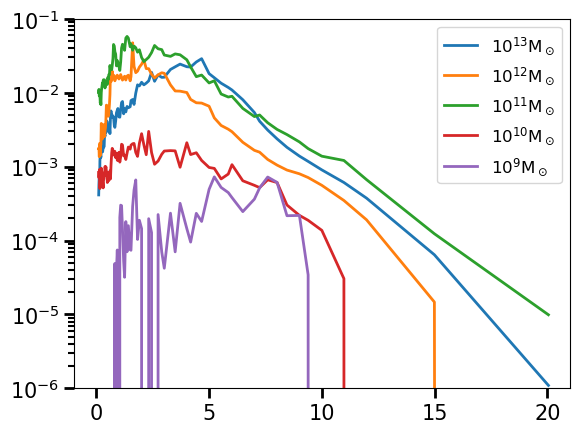

In [18]:
plt.rcParams.update({'font.size': 15})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5

plt.plot(redshifts[8:], SFH2_91[::-1], label='$10^{13}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH3_91[::-1], label='$10^{12}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH4_91[::-1], label='$10^{11}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH5_91[::-1], label='$10^{10}$M$_\odot$', linewidth=2)
plt.plot(redshifts[8:], SFH6_91[::-1], label='$10^{9}$M$_\odot$', linewidth=2)
plt.yscale('log')
plt.legend(fontsize=12)
plt.ylim(1e-6, 1e-1)
plt.xlim(-1, 21)

In [19]:
# for report

In [20]:
SFH = []
with open('./SFH_Report.txt', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFH.append(row)
SFH2 = [float(num) for num in SFH[0][::-1]]
SFH3 = [float(num) for num in SFH[1][::-1]]
SFH4 = [float(num) for num in SFH[2][::-1]]
SFH5 = [float(num) for num in SFH[3][::-1]]
SFH6 = [float(num) for num in SFH[4][::-1]]

Text(0, 0.5, 'CSFRD ($M_\\odot$ yr$^{-1}$ Mpc$^{-3}$)')

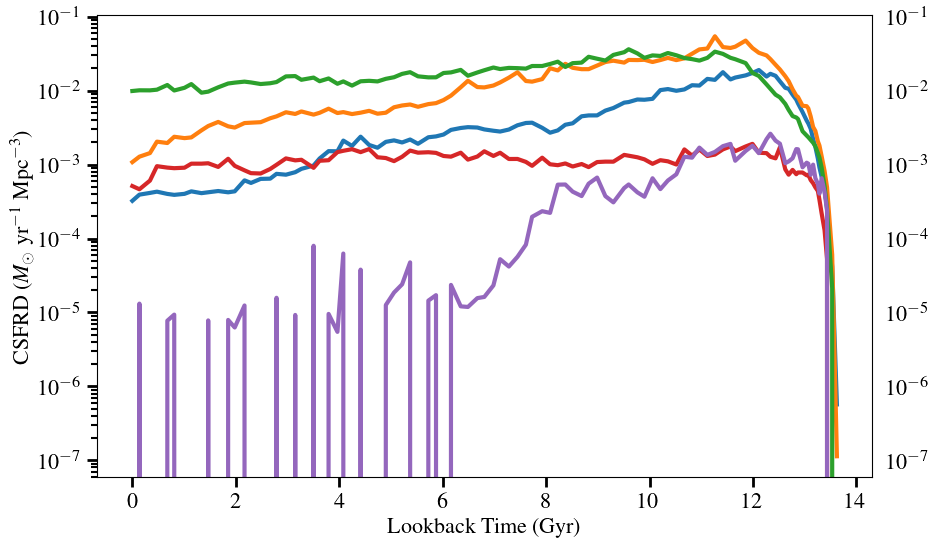

In [21]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2

mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5

plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')

plt.plot(lb_time99, SFH2, lw=3, label='mass2')
plt.plot(lb_time99, SFH3, lw=3, label='mass3')
plt.plot(lb_time99, SFH4, lw=3, label='mass4')
plt.plot(lb_time99, SFH5, lw=3, label='mass5')
plt.plot(lb_time99, SFH6, lw=3, label='mass6')
plt.yscale('log')
plt.xlabel('Lookback Time (Gyr)')
plt.ylabel(r'CSFRD ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')

In [5]:
allSFR2 = []
with open('./Subhalo Data/mass2_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH2_99 = [(num*(139/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass3_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH3_99 = [(num*(1371/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass4_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH4_99 = [(num*(12271/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass5_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH5_99 = [(num*(85812/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass6_99', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH6_99 = [(num*(650475/33))/(106.5**3) for num in SFR2]  # normalisation

In [6]:
total = [sum(num) for num in zip(SFH2_99, SFH3_99, SFH4_99, SFH5_99, SFH6_99)]

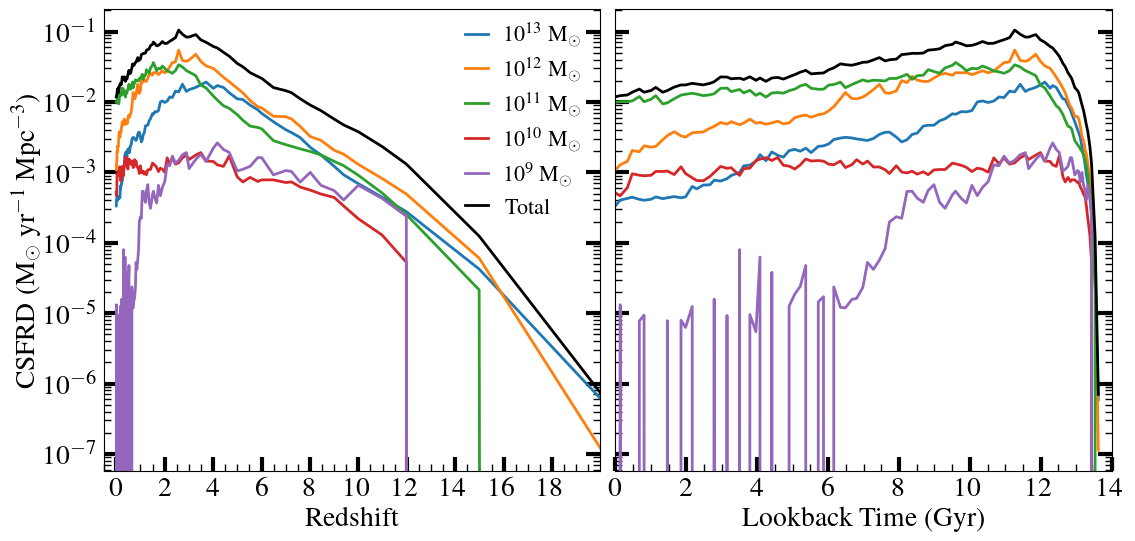

In [7]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
plt.subplots_adjust(wspace=0.03)

ax = axes[0]

ax.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.plot(redshifts, SFH2_99[::-1], lw=2, label='$10^{13}$ M$_\odot$')
ax.plot(redshifts, SFH3_99[::-1], lw=2, label='$10^{12}$ M$_\odot$')
ax.plot(redshifts, SFH4_99[::-1], lw=2, label='$10^{11}$ M$_\odot$')
ax.plot(redshifts, SFH5_99[::-1], lw=2, label='$10^{10}$ M$_\odot$')
ax.plot(redshifts, SFH6_99[::-1], lw=2, label='$10^9$ M$_\odot$')
ax.plot(redshifts, total[::-1], lw=2, label='Total', color='k')

ax.set_yscale('log')
ax.set_ylabel(r'CSFRD (M$_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
ax.set_xlabel("Redshift")
#ax.set_ylim(8e-8, 2e-2)
ax.set_xlim(-0.5,19.999)

ax2 = axes[1]

ax2.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax2.plot(lb_time99, SFH2_99[::-1], lw=2, label='$10^{13}$ M$_\odot$')
ax2.plot(lb_time99, SFH3_99[::-1], lw=2, label='$10^{12}$ M$_\odot$')
ax2.plot(lb_time99, SFH4_99[::-1], lw=2, label='$10^{11}$ M$_\odot$')
ax2.plot(lb_time99, SFH5_99[::-1], lw=2, label='$10^{10}$ M$_\odot$')
ax2.plot(lb_time99, SFH6_99[::-1], lw=2, label='$10^9$ M$_\odot$')
ax2.plot(lb_time99, total[::-1], lw=2, label='Total', color='k')

ax2.set_yscale('log')
ax2.set_yticklabels([])
ax2.set_xlabel("Lookback Time (Gyr)")
#ax2.set_ylim(8e-8, 2e-2)
ax2.set_xlim(0,14)
ax.legend(loc=(0.71,0.53), frameon=False, fontsize=16, ncol=1, handlelength=1)

plt.savefig("SFH.png") 
plt.show()

In [13]:
SFH2_99[::-1].index(np.max(SFH2_99)), lb_time99[77]

(77, 12.114590964579374)

In [54]:
redshifts, lb_time99.index(9.596848695347704) # 1.53123902915761

(array([2.22044605e-16, 9.52166697e-03, 2.39744284e-02, 3.37243719e-02,
        4.85236300e-02, 5.85073228e-02, 7.36613847e-02, 8.38844308e-02,
        9.94018026e-02, 1.09869940e-01, 1.25759332e-01, 1.41876204e-01,
        1.52748769e-01, 1.69252033e-01, 1.80385262e-01, 1.97284182e-01,
        2.14425036e-01, 2.25988386e-01, 2.43540182e-01, 2.61343256e-01,
        2.73353347e-01, 2.97717685e-01, 3.10074120e-01, 3.28829724e-01,
        3.47853842e-01, 3.60687657e-01, 3.80167867e-01, 3.99926965e-01,
        4.19968942e-01, 4.40297849e-01, 4.60917794e-01, 4.81832943e-01,
        5.03047523e-01, 5.24565820e-01, 5.46392183e-01, 5.75980845e-01,
        5.98543288e-01, 6.21428745e-01, 6.44641841e-01, 6.76110411e-01,
        7.00106354e-01, 7.32636182e-01, 7.57441373e-01, 7.91068249e-01,
        8.16709979e-01, 8.51470901e-01, 8.86896938e-01, 9.23000816e-01,
        9.50531352e-01, 9.97294226e-01, 1.03551045e+00, 1.07445789e+00,
        1.11415056e+00, 1.15460271e+00, 1.20625808e+00, 1.248472

In [26]:
allSFR2 = []
with open('./Subhalo Data/mass2_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH2_67 = [(num*(98/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass3_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH3_67 = [(num*(1316/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass4_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH4_67 = [(num*(12112/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass5_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH5_67 = [(num*(88132/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass6_67', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH6_67 = [(num*(693957/33))/(106.5**3) for num in SFR2]  # normalisation

In [27]:
total = [sum(num) for num in zip(SFH2_67, SFH3_67, SFH4_67, SFH5_67, SFH6_67)]

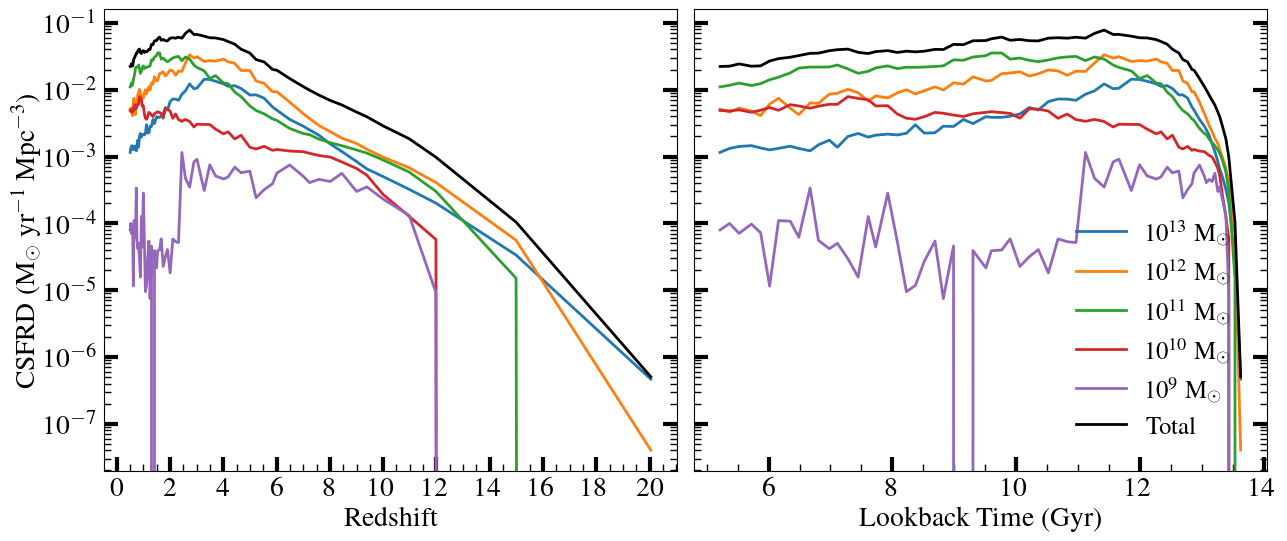

In [28]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.subplots_adjust(wspace=0.03)

ax = axes[0]

ax.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.plot(redshifts[32:], SFH2_67[::-1], lw=2, label='$10^{13}$ M$_\odot$')
ax.plot(redshifts[32:], SFH3_67[::-1], lw=2, label='$10^{12}$ M$_\odot$')
ax.plot(redshifts[32:], SFH4_67[::-1], lw=2, label='$10^{11}$ M$_\odot$')
ax.plot(redshifts[32:], SFH5_67[::-1], lw=2, label='$10^{10}$ M$_\odot$')
ax.plot(redshifts[32:], SFH6_67[::-1], lw=2, label='$10^9$ M$_\odot$')
ax.plot(redshifts[32:], total[::-1], lw=2, label='Total', color='k')

ax.set_yscale('log')
ax.set_ylabel(r'CSFRD (M$_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
ax.set_xlabel("Redshift")
#ax.set_ylim(8e-8, 2e-2)
#ax.set_xlim(-0.5,19.999)

ax2 = axes[1]

ax2.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax2.plot(lb_time67, SFH2_67[::-1], lw=2, label='$10^{13}$ M$_\odot$')
ax2.plot(lb_time67, SFH3_67[::-1], lw=2, label='$10^{12}$ M$_\odot$')
ax2.plot(lb_time67, SFH4_67[::-1], lw=2, label='$10^{11}$ M$_\odot$')
ax2.plot(lb_time67, SFH5_67[::-1], lw=2, label='$10^{10}$ M$_\odot$')
ax2.plot(lb_time67, SFH6_67[::-1], lw=2, label='$10^9$ M$_\odot$')
ax2.plot(lb_time67, total[::-1], lw=2, label='Total', color='k')

ax2.set_yscale('log')
ax2.set_yticklabels([])
ax2.set_xlabel("Lookback Time (Gyr)")
#ax2.set_ylim(8e-8, 2e-2)
#ax2.set_xlim(0,14)
ax2.legend(loc=(0.65,0.05), frameon=False, fontsize=18, ncol=1)

#plt.savefig("SFH.png") 
plt.show()

In [29]:
allSFR2 = []
with open('./Subhalo Data/mass2_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH2_50 = [(num*(55/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass3_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH3_50 = [(num*(1171/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass4_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH4_50 = [(num*(11594/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass5_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH5_50 = [(num*(89484/33))/(106.5**3) for num in SFR2]  # normalisation

allSFR2 = []
with open('./Subhalo Data/mass6_50', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        allSFR2.append(row)
for index, sfr_list in enumerate(allSFR2):
    allSFR2[index] = [float(x) for x in sfr_list]  # convert to floats
# sum values
SFR2 = [sum(x) for x in zip(allSFR2[0], allSFR2[1], allSFR2[2], allSFR2[3], allSFR2[4], allSFR2[5], allSFR2[6], allSFR2[7], allSFR2[8], allSFR2[9], allSFR2[10], allSFR2[11], allSFR2[12], allSFR2[13], allSFR2[14], allSFR2[15], allSFR2[16], allSFR2[17], allSFR2[18], allSFR2[19], allSFR2[20], allSFR2[21], allSFR2[22], allSFR2[23], allSFR2[24], allSFR2[25], allSFR2[26], allSFR2[27], allSFR2[28], allSFR2[29], allSFR2[30], allSFR2[31], allSFR2[32])]
SFH6_50 = [(num*(729551/33))/(106.5**3) for num in SFR2]  # normalisation

In [30]:
total = [sum(num) for num in zip(SFH2_50, SFH3_50, SFH4_50, SFH5_50, SFH6_50)]

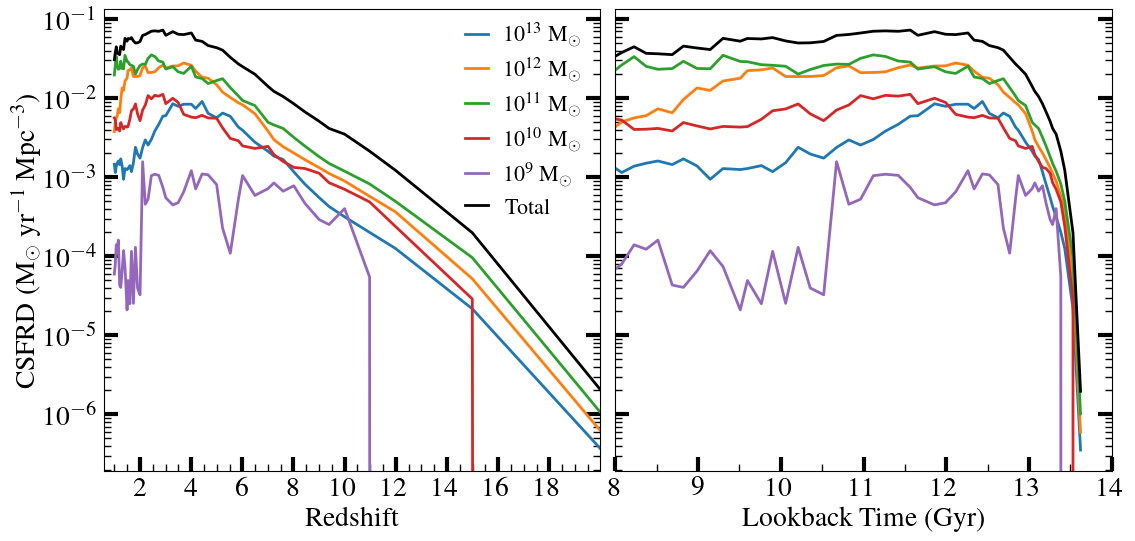

In [31]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
plt.subplots_adjust(wspace=0.03)

ax = axes[0]

ax.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.plot(redshifts[49:], SFH2_50[::-1], lw=2, label='$10^{13}$ M$_\odot$')
ax.plot(redshifts[49:], SFH3_50[::-1], lw=2, label='$10^{12}$ M$_\odot$')
ax.plot(redshifts[49:], SFH4_50[::-1], lw=2, label='$10^{11}$ M$_\odot$')
ax.plot(redshifts[49:], SFH5_50[::-1], lw=2, label='$10^{10}$ M$_\odot$')
ax.plot(redshifts[49:], SFH6_50[::-1], lw=2, label='$10^9$ M$_\odot$')
ax.plot(redshifts[49:], total[::-1], lw=2, label='Total', color='k')

ax.set_yscale('log')
ax.set_ylabel(r'CSFRD (M$_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
ax.set_xlabel("Redshift")
#ax.set_ylim(8e-8, 2e-2)
ax.set_xlim(0.6,19.999)

ax2 = axes[1]

ax2.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax2.plot(lb_time50, SFH2_50[::-1], lw=2, label='$10^{13}$ M$_\odot$')
ax2.plot(lb_time50, SFH3_50[::-1], lw=2, label='$10^{12}$ M$_\odot$')
ax2.plot(lb_time50, SFH4_50[::-1], lw=2, label='$10^{11}$ M$_\odot$')
ax2.plot(lb_time50, SFH5_50[::-1], lw=2, label='$10^{10}$ M$_\odot$')
ax2.plot(lb_time50, SFH6_50[::-1], lw=2, label='$10^9$ M$_\odot$')
ax2.plot(lb_time50, total[::-1], lw=2, label='Total', color='k')

ax2.set_yscale('log')
ax2.set_yticklabels([])
ax2.set_xlabel("Lookback Time (Gyr)")
#ax2.set_ylim(8e-8, 2e-2)
ax2.set_xlim(8,14)
ax.legend(loc=(0.71,0.53), frameon=False, fontsize=16, ncol=1, handlelength=1)

plt.savefig("SFH.png") 
plt.show()

In [32]:
SFH2_50[::-1][0], SFH2_50[::-1].index(np.max(SFH2_50[::-1])), redshifts[49:][31]

(0.0014598140702909062, 31, 4.42803373660555)

In [33]:
# plotting DTD

In [3]:
import pandas as pd
from hoki import load
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

In [4]:
bin_rates1 = load.model_output('./BPASS data/supernova-bin-imf135_300.z002.dat')
bin_rates2 = load.model_output('./BPASS data/supernova-bin-imf135_300.z020.dat')

In [5]:
bin_rates1 = bin_rates1[:-1]  # authors are unsure why the final bin does not work
age1 = bin_rates1.log_age.values  # first column in 'bin_rates' is 'log_age'
bin_size1 = bin_rates1.age_yrs.values  # final column in 'bin_rates' is 'age_yrs'

ccsne1 = (bin_rates1[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))  # summing CCSNe

# normalising the transient rates
ccsne_norm1 = ccsne1/bin_size1/(10**6)
typeIa_norm1 = bin_rates1.Ia.values/bin_size1/(10**6)
lgrbs_norm1 = bin_rates1.LGRB.values/bin_size1/(10**6)
pisne_norm1 = bin_rates1.PISNe.values/bin_size1/(10**6)

In [6]:
bin_rates2 = bin_rates2[:-1]  # authors are unsure why the final bin does not work
age2 = bin_rates2.log_age.values  # first column in 'bin_rates' is 'log_age'
bin_size2 = bin_rates2.age_yrs.values  # final column in 'bin_rates' is 'age_yrs'

ccsne2 = (bin_rates2[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))  # summing CCSNe

# normalising the transient rates
ccsne_norm2 = ccsne2/bin_size2/(10**6)
typeIa_norm2 = bin_rates2.Ia.values/bin_size2/(10**6)
lgrbs_norm2 = bin_rates2.LGRB.values/bin_size2/(10**6)
pisne_norm2 = bin_rates2.PISNe.values/bin_size2/(10**6)

In [7]:
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

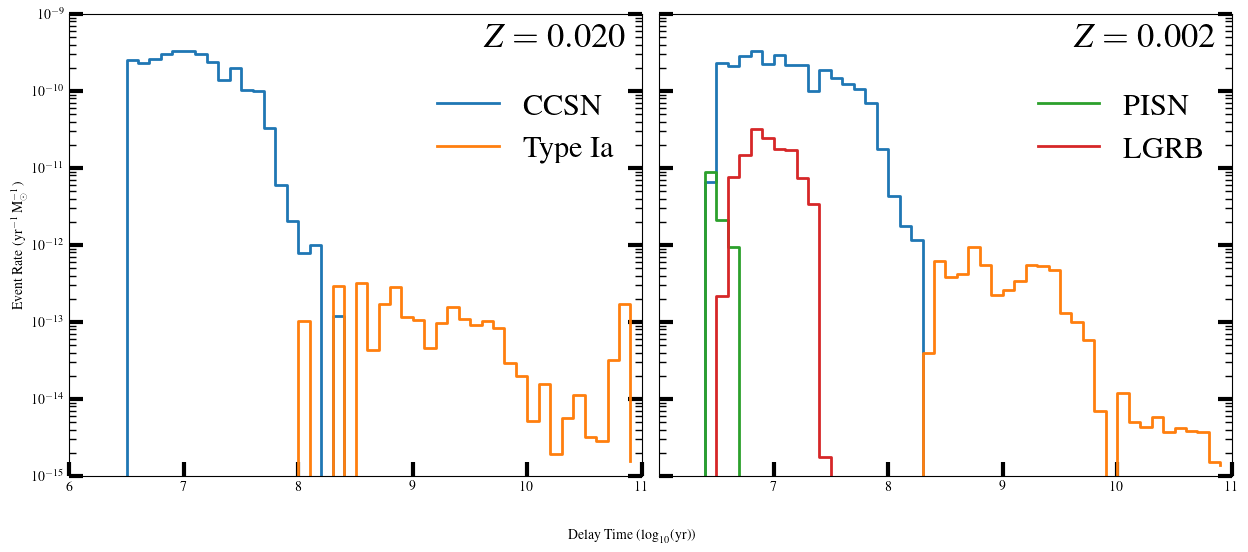

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.subplots_adjust(wspace=0.03)
ax = axes[0]

ax.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')

ax.set_ylabel(r"Event Rate (yr$^{-1}$ M$_\odot^{-1}$)")

ax.step(age2, ccsne_norm2, where="post", lw=2, label="CCSN")
ax.step(age2, typeIa_norm2, where="post", lw=2, label="Type Ia")
ax.step(age2, pisne_norm2, where="post", lw=2)
ax.step(age2, lgrbs_norm2, where="post", lw=2)
#ax.step(x_axis, x1["Ib"], where="post", color=colors(5), lw=3)
#ax.step(x_axis, x1["Ic"], where="post", color=colors(6), lw=3)
ax.set_yscale('log')
ax.set_xlim(6,11)
ax.set_ylim(1e-15,1e-9)

ax.legend(bbox_to_anchor=(1, 0.89), loc="upper right", frameon=False, fontsize=22, ncol=1)


ax2 = axes[1]

ax2.xaxis.set_tick_params(which='major', size=10, width=3, direction='in')
ax.xaxis.set_tick_params(which='minor', size=5, width=1, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=3, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=5, width=1, direction='in', right='on')

ax2.step(age1, ccsne_norm1, where="post", lw=2)
ax2.step(age1, typeIa_norm1, where="post", lw=2)
ax2.step(age1, pisne_norm1, where="post", lw=2, label="PISN")
ax2.step(age1, lgrbs_norm1, where="post", lw=2, label="LGRB")
#ax.step(x_axis, x1["Ib"], where="post", color=colors(5), lw=3)
#ax.step(x_axis, x1["Ic"], where="post", color=colors(6), lw=3)
ax2.set_yscale('log')
ax2.set_xlim(6.000001,11)
ax2.set_ylim(1e-15,1e-9)
ax2.set_yticklabels([])

ax2.legend(bbox_to_anchor=(1, 0.89), loc="upper right", frameon=False, fontsize=22, ncol=1)


ax.text(0.97, 0.93, r"$Z=0.020$", horizontalalignment='right', transform=ax.transAxes, fontsize=25)
ax2.text(0.97, 0.93, r"$Z=0.002$", horizontalalignment='right', transform=ax2.transAxes, fontsize=25)
fig.text(0.5,0,r"Delay Time ($\log_{10}$(yr))", ha="center", va="bottom")

plt.savefig("DTD.png") 
plt.show()

In [10]:
ccsne_norm1, age1

(0     0.000000e+00
 1     0.000000e+00
 2     0.000000e+00
 3     0.000000e+00
 4     6.638148e-12
 5     2.298171e-10
 6     2.081035e-10
 7     2.838661e-10
 8     3.327272e-10
 9     2.209807e-10
 10    2.916549e-10
 11    2.145323e-10
 12    2.203391e-10
 13    9.887959e-11
 14    1.858520e-10
 15    1.494189e-10
 16    1.244227e-10
 17    1.067468e-10
 18    6.939987e-11
 19    1.761969e-11
 20    4.361271e-12
 21    1.762938e-12
 22    1.144718e-12
 23    0.000000e+00
 24    0.000000e+00
 25    0.000000e+00
 26    0.000000e+00
 27    0.000000e+00
 28    0.000000e+00
 29    0.000000e+00
 30    0.000000e+00
 31    0.000000e+00
 32    0.000000e+00
 33    0.000000e+00
 34    0.000000e+00
 35    0.000000e+00
 36    0.000000e+00
 37    0.000000e+00
 38    0.000000e+00
 39    0.000000e+00
 40    0.000000e+00
 41    0.000000e+00
 42    0.000000e+00
 43    0.000000e+00
 44    0.000000e+00
 45    0.000000e+00
 46    0.000000e+00
 47    0.000000e+00
 48    0.000000e+00
 49    0.000000e+00


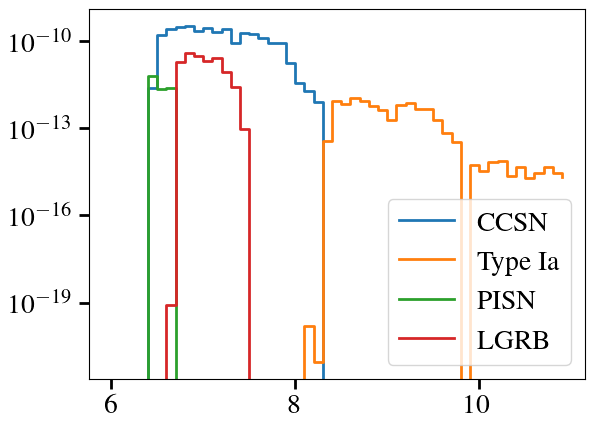

In [40]:
bin_rates = load.model_output('./BPASS data/supernova-bin-imf135_300.z001.dat')

bin_rates = bin_rates[:-1]  # authors are unsure why the final bin does not work
age = bin_rates.log_age.values  # first column in 'bin_rates' is 'log_age'
bin_size = bin_rates.age_yrs.values  # final column in 'bin_rates' is 'age_yrs'

ccsne = (bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))  # summing CCSNe

# normalising the transient rates
ccsne_norm = ccsne/bin_size/(10**6)
typeIa_norm = bin_rates.Ia.values/bin_size/(10**6)
lgrbs_norm = bin_rates.LGRB.values/bin_size/(10**6)
pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)

plt.step(age, ccsne_norm, where="post", lw=2, label="CCSN")
plt.step(age, typeIa_norm, where="post", lw=2, label="Type Ia")
plt.step(age, pisne_norm, where="post", lw=2, label="PISN")
plt.step(age, lgrbs_norm, where="post", lw=2, label="LGRB")
plt.yscale('log')
plt.legend()

In [55]:
ccsne_norm, age

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.57982761e-20, 9.14668615e-22, 3.59063610e-14,
        8.66564487e-13, 6.53900755e-13, 1.09156181e-12, 8.75803262e-13,
        5.93548798e-13, 4.11245297e-13, 1.94138673e-13, 6.18317093e-13,
        7.11355758e-13, 4.75988386e-13, 4.61895485e-13, 1.88743380e-13,
        6.86774296e-14, 3.42303473e-14, 0.00000000e+00, 5.29326093e-15,
        3.35770155e-15, 7.04750684e-15, 7.36815459e-15, 2.21111617e-15,
        4.75356538e-15, 1.92190024e-15, 2.79535812e-15, 4.65417234e-15,
        2.84322774e-15, 2.04697771e-15]),
 array([ 6.       ,  6.0999999,  6.1999998,  6.3000002,  6.4000001,
         6.5      ,  6.599